# Project Credit Risk

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
statlog_german_credit_data = fetch_ucirepo(id=144) 
credit = pd.concat([pd.DataFrame(statlog_german_credit_data.data.features), pd.DataFrame(statlog_german_credit_data.data.targets)], axis=1)
credit.columns = ['Checking_status_acc','Duration','Credit_history','Purpose','Amount','Savings_status','Employment','Installment_rate','Marital_Gender','Guarantors','Address_time','Property','Age','Other_installments','Housing','existing_loans','Occupation','Dependents','Phone','Foreign_worker', 'Target']
credit.head()

,Checking_status_acc,Duration,Credit_history,Purpose,Amount,Savings_status,Employment,Installment_rate,Marital_Gender,Guarantors,...,Property,Age,Other_installments,Housing,existing_loans,Occupation,Dependents,Phone,Foreign_worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
credit.shape

(1000, 21)

In [6]:
print(credit.columns.tolist())

['Checking_status_acc', 'Duration', 'Credit_history', 'Purpose', 'Amount', 'Savings_status', 'Employment', 'Installment_rate', 'Marital_Gender', 'Guarantors', 'Address_time', 'Property', 'Age', 'Other_installments', 'Housing', 'existing_loans', 'Occupation', 'Dependents', 'Phone', 'Foreign_worker', 'Target']


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Checking_status_acc  1000 non-null   object
 1   Duration             1000 non-null   int64 
 2   Credit_history       1000 non-null   object
 3   Purpose              1000 non-null   object
 4   Amount               1000 non-null   int64 
 5   Savings_status       1000 non-null   object
 6   Employment           1000 non-null   object
 7   Installment_rate     1000 non-null   int64 
 8   Marital_Gender       1000 non-null   object
 9   Guarantors           1000 non-null   object
 10  Address_time         1000 non-null   int64 
 11  Property             1000 non-null   object
 12  Age                  1000 non-null   int64 
 13  Other_installments   1000 non-null   object
 14  Housing              1000 non-null   object
 15  existing_loans       1000 non-null   int64 
 16  Occupat

In [8]:
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [15]:
credit.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [10]:
credit['Checking_status_acc'].value_counts()

Checking_status_acc
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

In [12]:
credit['Credit_history'].value_counts()

Credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

In [17]:
pd.crosstab(credit.Credit_history, credit.Target)

Target,1,2
Credit_history,,
A30,15,25
A31,21,28
A32,361,169
A33,60,28
A34,243,50


In [28]:
pd.crosstab(credit.Employment, credit.Target )

Target,1,2
Employment,,
A71,39,23
A72,102,70
A73,235,104
A74,135,39
A75,189,64


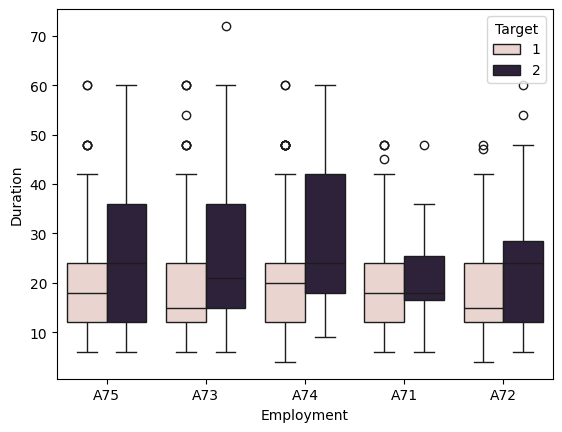

In [27]:
sns.boxplot(x='Employment', y='Duration', hue='Target', data=credit)
plt.show()

In [11]:
credit.head()

,Checking_status_acc,Duration,Credit_history,Purpose,Amount,Savings_status,Employment,Installment_rate,Marital_Gender,Guarantors,...,Property,Age,Other_installments,Housing,existing_loans,Occupation,Dependents,Phone,Foreign_worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [35]:
print(statlog_german_credit_data.metadata) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [36]:
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no
